In [1]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Input Data

In [2]:
con = sqlite3.connect('../Dataset/hotel-directories-ORI.sqlite3')
df_room = pd.read_sql_query("SELECT * FROM hotel_rooms", con)
df_hotel = pd.read_sql_query("SELECT * FROM hotels", con)

In [3]:
df_room.head(2)

,id,hotelId,name,images,roomType,description,originalDescription,bedDescription,size,rate,...,numExtraBeds,numChargedRooms,numRemainingRooms,numBreakfastIncluded,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,extraBedIsIncluded,facilities
0,1000009181,3000020003208,Family,"[""https://ik.imagekit.io/tvlk/generic-asset/dg...",Family,None,None,None,30.0,"{""amount"":""989182"",""currency"":""IDR"",""tax"":""207...",...,0,1,3,NaN,1,1,1,0,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BLACKOUT_DRAP..."
1,1000009219,3000020003208,President Suite,"[""https://ik.imagekit.io/tvlk/generic-asset/dg...",President Suite,None,None,None,75.0,"{""amount"":""3272727"",""currency"":""IDR"",""tax"":""68...",...,0,1,1,NaN,1,1,1,0,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BLACKOUT_DRAP..."


In [4]:
df_hotel.head(2)

,id,type,name,displayName,description,link,address,region,city,province,...,images,facilities,properties,nearestPointOfInterests,starRating,userRating,userRatingInfo,numReviews,latitude,longitude
0,3000020003208,Hotel,Kyriad Hotel Muraya Aceh,Kyriad Hotel Muraya Aceh,<p><b>Lokasi</b><br>Kyriad Hotel Muraya Aceh b...,https://www.traveloka.com/id-id/hotel/detail?s...,Jalan Tengku H. Mohd Daud Beureueuh No. 5 Kuta...,Aceh,Banda Aceh,Aceh,...,"[""https://ik.imagekit.io/tvlk/apr-asset/dgXfoy...","[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""COFFEE_SH...","{""checkInTime"":""14:00"",""checkOutTime"":""12:00"",...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",4.0,8.6,Mengesankan,1845.0,5.556686,95.322269
1,3000010003879,Hotel,Hermes Palace by BENCOOLEN,Hermes Palace by BENCOOLEN,<p><b>Lokasi</b><br>Hermes Palace by BENCOOLEN...,https://www.traveloka.com/id-id/hotel/detail?s...,Jalan. T. Panglima Nyak Makam Banda Aceh Aceh ...,Aceh,Banda Aceh,Aceh,...,"[""https://ik.imagekit.io/tvlk/apr-asset/dgXfoy...","[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""HAS_24_HO...","{""checkInTime"":""14:00"",""checkOutTime"":""12:00"",...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",5.0,8.4,Mengesankan,2525.0,5.556202,95.344114


## Drop Unnecessary Column

### Room Table

In [5]:
for i in df_room.columns:
    if df_room[i].nunique() == 1:
        print(f'{i}: {df_room[i].nunique()}')

numExtraBeds: 1
numChargedRooms: 1
extraBedIsIncluded: 1


In [6]:
room_drop = ['images', 'description', 'bedDescription', 'originalDescription', 'rate', 'maxOccupancy', 'numRemainingRooms', 
            'extraBedIsIncluded', 'numExtraBeds', 'numChargedRooms', 'roomType']
df_room.drop(room_drop, axis=1, inplace=True)

df_room.head(2)

,id,hotelId,name,size,originalRate,baseOccupancy,maxChildOccupancy,maxChildAge,numBreakfastIncluded,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,facilities
0,1000009181,3000020003208,Family,30.0,"{""amount"":""999174"",""currency"":""IDR"",""tax"":""209...",2,1,10,NaN,1,1,1,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BLACKOUT_DRAP..."
1,1000009219,3000020003208,President Suite,75.0,"{""amount"":""3305785"",""currency"":""IDR"",""tax"":""69...",2,1,10,NaN,1,1,1,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BLACKOUT_DRAP..."


Description:
- Drop the column with no relation to price estimation (`images`, `description`, `bedDescription`, `originalDescription`, `numRemainingRooms`, `roomType`)
- Drop the column with only 1 unique value (`extraBedIsIncluded`, `numExtraBeds`, `numChargedRooms`)
- Drop `rate` column because it is the discounted price from the original price (`originalRate`) on the platform
- Drop `maxOccupancy` column because it is the same as `baseOccupancy`+`maxChildOccupancy` column

### Hotel Table

In [7]:
for i in df_hotel.columns:
    if df_hotel[i].nunique() == 1:
        print(f'{i}: {df_hotel[i].nunique()}')
print('Column with 1 unique value')

country: 1
Column with 1 unique value


In [8]:
hotel_drop = ['displayName', 'description', 'link', 'address', 'region', 'country', 'geodirectoryId', 'postal', 'image', 
            'images', 'userRating', 'latitude', 'longitude', 'userRatingInfo', 'numReviews', 'properties', ]
df_hotel.drop(hotel_drop, axis=1, inplace=True)

df_hotel.head(2)

,id,type,name,city,province,facilities,nearestPointOfInterests,starRating
0,3000020003208,Hotel,Kyriad Hotel Muraya Aceh,Banda Aceh,Aceh,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""COFFEE_SH...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",4.0
1,3000010003879,Hotel,Hermes Palace by BENCOOLEN,Banda Aceh,Aceh,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""HAS_24_HO...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",5.0


Description:
- Drop the column with no relation to price estimation (`displayName`, `description`, `link`, `geodirectoryId`, `postal`, `image`, `images`)
- Drop the column with only 1 unique value (`country`)
- Drop `address`, `geodirectoryId`, `potal`, `latitude`, `longitude` because they are the same as `city` column

## Combine Dataset Based on ID

In [9]:
# rename columns

df_hotel.rename(columns={'id': 'hotelId'}, inplace=True)
df_hotel.rename(columns={'name': 'hotelName'}, inplace=True)
df_hotel.rename(columns={'facilities': 'hotelFacilities'}, inplace=True)
df_room.rename(columns={'facilities': 'roomFacilities'}, inplace=True)
df_hotel.head(2)

,hotelId,type,hotelName,city,province,hotelFacilities,nearestPointOfInterests,starRating
0,3000020003208,Hotel,Kyriad Hotel Muraya Aceh,Banda Aceh,Aceh,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""COFFEE_SH...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",4.0
1,3000010003879,Hotel,Hermes Palace by BENCOOLEN,Banda Aceh,Aceh,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""HAS_24_HO...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",5.0


In [10]:
df = pd.merge(df_hotel, df_room, on='hotelId', how='inner')
df.head(2)

,hotelId,type,hotelName,city,province,hotelFacilities,nearestPointOfInterests,starRating,id,name,...,originalRate,baseOccupancy,maxChildOccupancy,maxChildAge,numBreakfastIncluded,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,roomFacilities
0,3000020003208,Hotel,Kyriad Hotel Muraya Aceh,Banda Aceh,Aceh,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""COFFEE_SH...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",4.0,1000009181,Family,...,"{""amount"":""999174"",""currency"":""IDR"",""tax"":""209...",2,1,10,NaN,1,1,1,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BLACKOUT_DRAP..."
1,3000020003208,Hotel,Kyriad Hotel Muraya Aceh,Banda Aceh,Aceh,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""COFFEE_SH...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",4.0,1000009219,President Suite,...,"{""amount"":""3305785"",""currency"":""IDR"",""tax"":""69...",2,1,10,NaN,1,1,1,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BLACKOUT_DRAP..."


### Filter for Bali Province

In [11]:
df = df[df['province'] == 'Bali']
df.reset_index(drop=True, inplace=True)
df.shape

(7221, 21)

In [12]:
print(f'Total Hotel : {df.hotelId.nunique()}')
print(f'Total Hotel Room : {df.shape[0]}')

Total Hotel : 2720
Total Hotel Room : 7221


In [13]:
# drop another columns
drop = ['hotelId', 'hotelName', 'province', 'id', 'name']
for column_name in drop:
    df.drop(column_name, axis=1, inplace=True)
print(df.shape)
df.head(3)

(7221, 16)


,type,city,hotelFacilities,nearestPointOfInterests,starRating,size,originalRate,baseOccupancy,maxChildOccupancy,maxChildAge,numBreakfastIncluded,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,roomFacilities
0,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4.0,46.0,"{""amount"":""1227273"",""currency"":""IDR"",""tax"":""25...",3,1,5,NaN,1,1,1,0,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB..."
1,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4.0,31.0,"{""amount"":""596694"",""currency"":""IDR"",""tax"":""125...",2,1,5,NaN,0,1,1,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BATHTUB"",""BLA..."
2,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4.0,52.0,"{""amount"":""1450413"",""currency"":""IDR"",""tax"":""30...",2,1,5,NaN,1,1,1,1,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB..."


## Original Rate/Target Processing

In [14]:
df.loc[0, 'originalRate']

'{"amount":"1227273","currency":"IDR","tax":"257727"}'

In [15]:
# Exstract original rate
for i in range (len(df['originalRate'])):
    df.loc[i, 'originalRate'] = df['originalRate'][i].split('"')[3]
    # df['originalRate'][i] = int(df['originalRate'][i].split('"')[11])
df['originalRate'] = df['originalRate'].astype(int)
df.head(2)

,type,city,hotelFacilities,nearestPointOfInterests,starRating,size,originalRate,baseOccupancy,maxChildOccupancy,maxChildAge,numBreakfastIncluded,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,roomFacilities
0,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4.0,46.0,1227273,3,1,5,NaN,1,1,1,0,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB..."
1,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4.0,31.0,596694,2,1,5,NaN,0,1,1,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BATHTUB"",""BLA..."


In [16]:
df.shape

(7221, 16)

In [17]:
# Checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7221 entries, 0 to 7220
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type                     7221 non-null   object 
 1   city                     7221 non-null   object 
 2   hotelFacilities          7221 non-null   object 
 3   nearestPointOfInterests  7221 non-null   object 
 4   starRating               7221 non-null   float64
 5   size                     5137 non-null   object 
 6   originalRate             7221 non-null   int32  
 7   baseOccupancy            7221 non-null   int64  
 8   maxChildOccupancy        7221 non-null   int64  
 9   maxChildAge              7221 non-null   int64  
 10  numBreakfastIncluded     133 non-null    float64
 11  isBreakfastIncluded      7221 non-null   int64  
 12  isWifiIncluded           7221 non-null   int64  
 13  isRefundable             7221 non-null   int64  
 14  hasLivingRoom           

In [18]:
# change size data type to float
df['size'] = df['size'].astype(float)
df['size'].dtype

dtype('float64')

---------

## Data Analysis and Cleaning

### Check Missing and Duplicate value

In [19]:
df.isnull().sum()

type                          0
city                          0
hotelFacilities               0
nearestPointOfInterests       0
starRating                    0
size                       2084
originalRate                  0
baseOccupancy                 0
maxChildOccupancy             0
maxChildAge                   0
numBreakfastIncluded       7088
isBreakfastIncluded           0
isWifiIncluded                0
isRefundable                  0
hasLivingRoom                 0
roomFacilities                0
dtype: int64

- Because the amount of nan value in `numBreakfastIncluded` column is too high, we will drop this column
- `size` will be handled after some analysis

In [20]:
df.drop(['numBreakfastIncluded'], axis=1, inplace=True)

In [21]:
# show index who has duplicate value
df.duplicated().sum()

275

In [22]:
df.drop_duplicates(inplace=True)
# df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(6946, 15)

### Data Statistics

In [23]:
originalRows = df.shape[0]

print(f'Total number of rows: {df.shape[0]}')
print(f'Total number of columns: {df.shape[1]}')

Total number of rows: 6946
Total number of columns: 15


In [24]:
df.describe()

,starRating,size,originalRate,baseOccupancy,maxChildOccupancy,maxChildAge,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom
count,6946.000000,4959.000000,6.946000e+03,6946.000000,6946.000000,6946.000000,6946.000000,6946.000000,6946.000000,6946.000000
mean,2.940901,110.373573,2.765252e+06,2.023179,0.489922,5.200547,0.479413,0.880651,0.401958,0.048229
std,1.549356,878.573270,7.782595e+06,1.403547,0.658531,4.367687,0.499612,0.324222,0.490329,0.214266
min,0.000000,0.000000,4.031300e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,24.000000,5.509640e+05,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,35.000000,1.239669e+06,2.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,65.000000,2.977504e+06,2.000000,1.000000,10.000000,1.000000,1.000000,1.000000,0.000000
max,6.000000,36000.000000,3.175333e+08,30.000000,10.000000,17.000000,1.000000,1.000000,1.000000,1.000000


- Nilai minimum pada kolom `size` adalah 0, yang berarti ada data yang tidak valid. 

In [25]:
# print the number of unique values in each column
print('Number of unique values above 10 in each column:')
for i in df.describe().columns:
    if df[i].nunique() > 10:
        print(f'{i}: {df[i].nunique()}')

Number of unique values above 10 in each column:
starRating: 11
size: 330
originalRate: 3778
baseOccupancy: 17
maxChildAge: 18


In [26]:
# Drop rows if value in 'size' is 1 and below 1
for i in range(len(df)):
    x = df['size'][i]
    if x <= 1:
        df.drop(i, inplace=True, axis=0)

print(f'Total number of rows: {df.shape[0]}')
print(f'Total number of deleted rows: {originalRows-df.shape[1]}')
print('Size Minimum value : {}'.format(df['size'].min()))

Total number of rows: 6908
Total number of deleted rows: 6931
Size Minimum value : 2.0


### Function

In [27]:
# count outlier with IQR
def iqr_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[col][((df[col] < (q1 - 1-5 * iqr)) | (df[col] > (q3 + 1.5 * iqr)))]
    print('Number of outliers: '+ str(len(outliers)))
    print('Max outlier value: '+ str(outliers.max()))
    print('Min outlier value: '+ str(outliers.min()))   
    return df.loc[(df[col] <= q3 + 1.5 * iqr) & (df[col] >= q1 - 1.5 * iqr)]

### Data Distribution

#### OriginalRate Distribution

OriginalRate
maximum value : 317533333
minimum value : 40313
skew value : 21.34


<Figure size 1600x800 with 0 Axes>

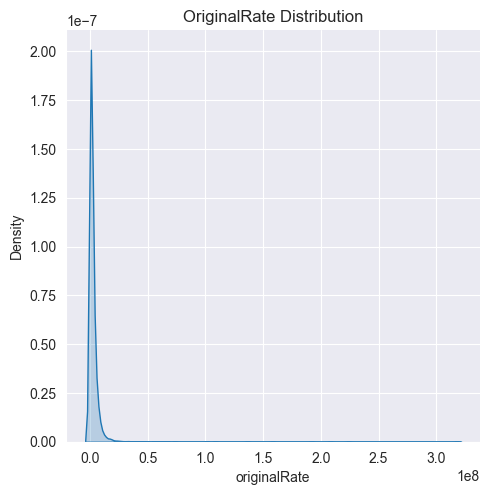

In [28]:
# OriginalRate Statistics
print('OriginalRate')
print(f'maximum value : {df.originalRate.max()}')
print(f'minimum value : {df.originalRate.min()}')
print(f'skew value : {round(df.originalRate.skew(), 2)}')

# OriginalRate Distribution
sns.set_style('darkgrid')
plt.figure(figsize=(20, 10), dpi=80)
sns.displot(df,x="originalRate", kind="kde", fill=True).set(title='OriginalRate Distribution')
plt.show()

In [29]:
# Remove outlier in OriginalRate
df_len = len(df)
df = iqr_outlier(df, 'originalRate')
df_len = df_len - len(df)
print(f'Deleted row : {df_len}')
print(f'Remaining data : {df.shape[0]}')

Number of outliers: 554
Max outlier value: 317533333
Min outlier value: 6617993
Deleted row : 554
Remaining data : 6354


OriginalRate
Maximum value : 6611571
Minimum value : 40313
Skew value : 1.3


<Figure size 1600x800 with 0 Axes>

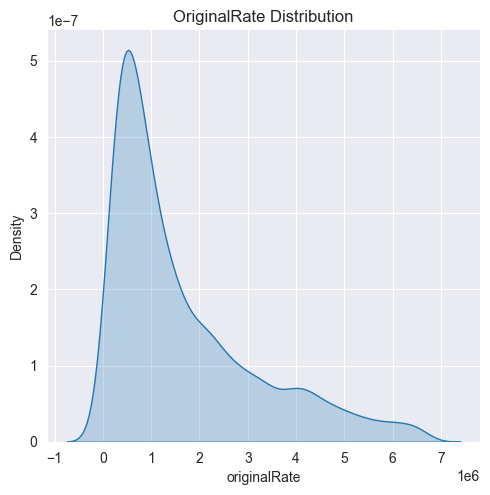

In [30]:
# OriginalRate Statistics
print('OriginalRate')
print(f'Maximum value : {df.originalRate.max()}')
print(f'Minimum value : {df.originalRate.min()}')
print(f'Skew value : {round(df.originalRate.skew(), 2)}')

# OriginalRate Distribution after removing outlier
plt.figure(figsize=(20, 10), dpi=80)
sns.set_style('darkgrid')
sns.displot(df,x="originalRate", kind="kde", fill=True).set(title='OriginalRate Distribution')
plt.show()

#### OriginalRate based on starRating

OriginalRate Distribution by starRating
3.0    1958
4.0    1772
0.0     967
5.0     597
2.0     539
1.0     308
3.5     132
2.5      56
1.5      14
4.5      11
Name: starRating, dtype: int64


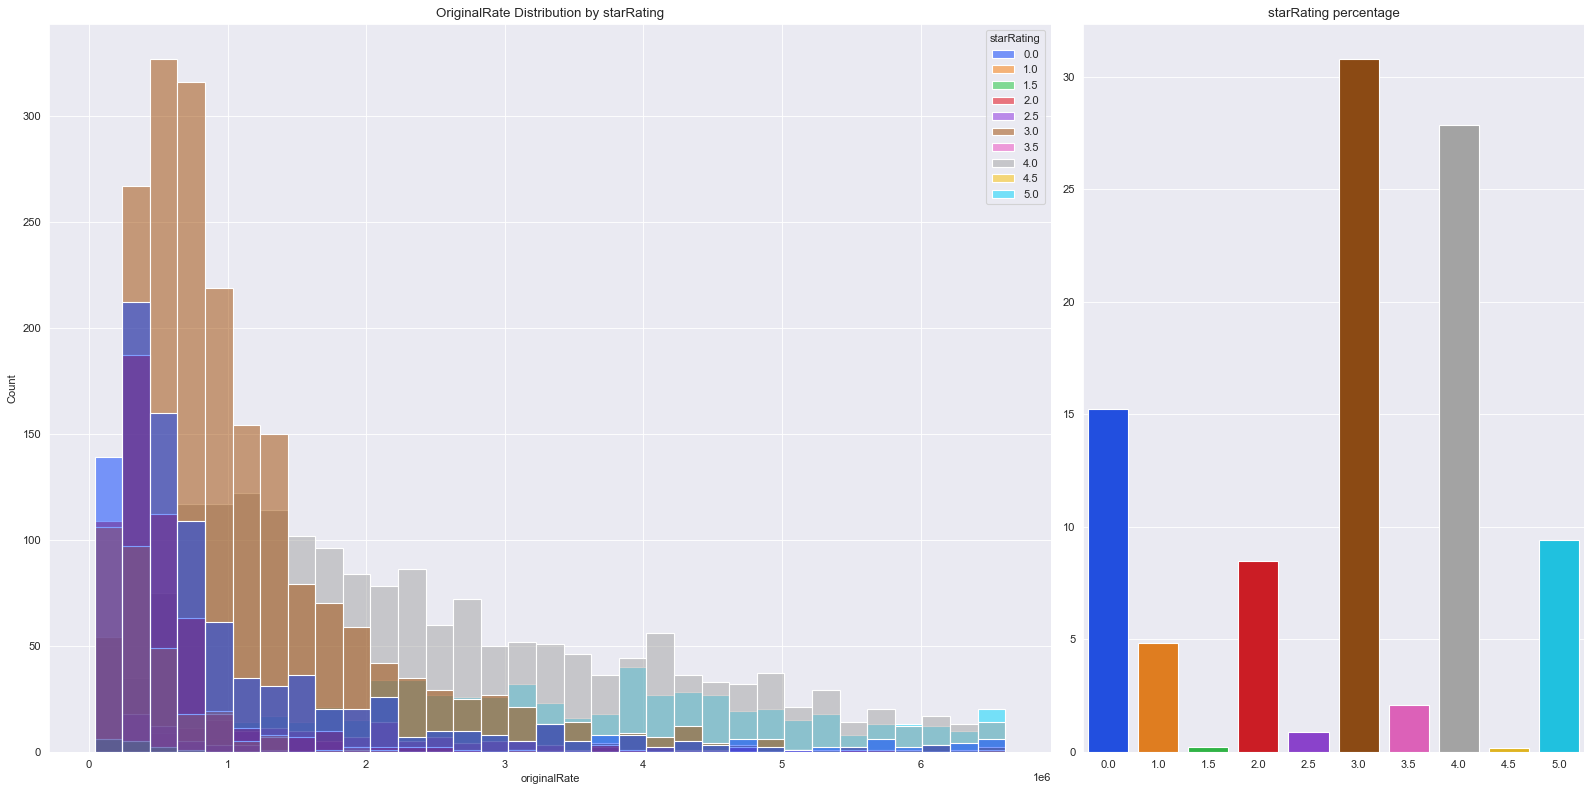

In [31]:
# starRating Distribution
value = df.starRating.value_counts()

# starRating Distribution by percentage
value_percentage = value / len(df) * 100

print('OriginalRate Distribution by starRating')
print(value)

fig, ax = plt.subplots(1,2, figsize=(20, 10), dpi=80, gridspec_kw={'width_ratios': [1, 0.5]})
sns.histplot(df,x="originalRate", hue='starRating' ,palette='bright', ax=ax[0]).set(title='OriginalRate Distribution by starRating')

# starRating percentage plot
sns.barplot(x=value_percentage.index, y=value_percentage.values, palette='bright', ax=ax[1]).set(title='starRating percentage')

fig.tight_layout()


- Because the amount of `starRating` with 0.5 star is to low, we will handle it with removing 0.5 `starRating`
- Change `starRating` to integer

OriginalRate Distribution by starRating
3    2090
4    1783
0     967
5     597
2     595
1     322
Name: starRating, dtype: int64


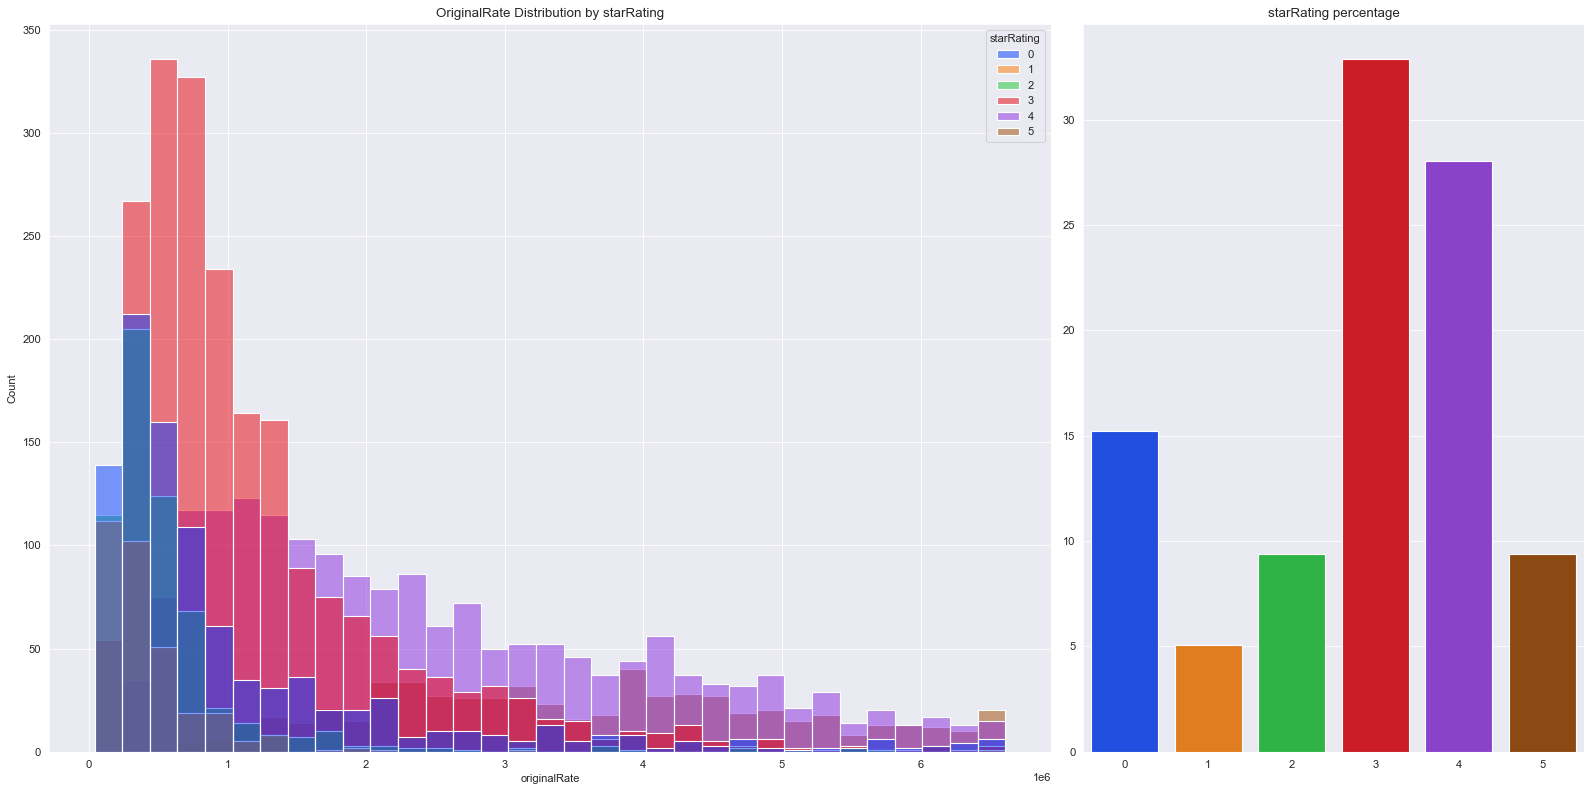

In [32]:
# change .5 star
df['starRating'] = df['starRating'].replace(1.5, 1)
df['starRating'] = df['starRating'].replace(2.5, 2)
df['starRating'] = df['starRating'].replace(3.5, 3)
df['starRating'] = df['starRating'].replace(4.5, 4)
# change starRating to interger
df['starRating'] = df['starRating'].astype(int)

# starRating Distribution
value = df.starRating.value_counts()

# starRating Distribution by percentage
value_percentage = value / len(df) * 100

print('OriginalRate Distribution by starRating')
print(value)

fig, ax = plt.subplots(1,2, figsize=(20, 10), dpi=80, gridspec_kw={'width_ratios': [1, 0.5]})
sns.histplot(df,x="originalRate", hue='starRating' ,palette='bright', ax=ax[0]).set(title='OriginalRate Distribution by starRating')

# starRating percentage plot
sns.barplot(x=value_percentage.index, y=value_percentage.values, palette='bright', ax=ax[1]).set(title='starRating percentage')

fig.tight_layout()


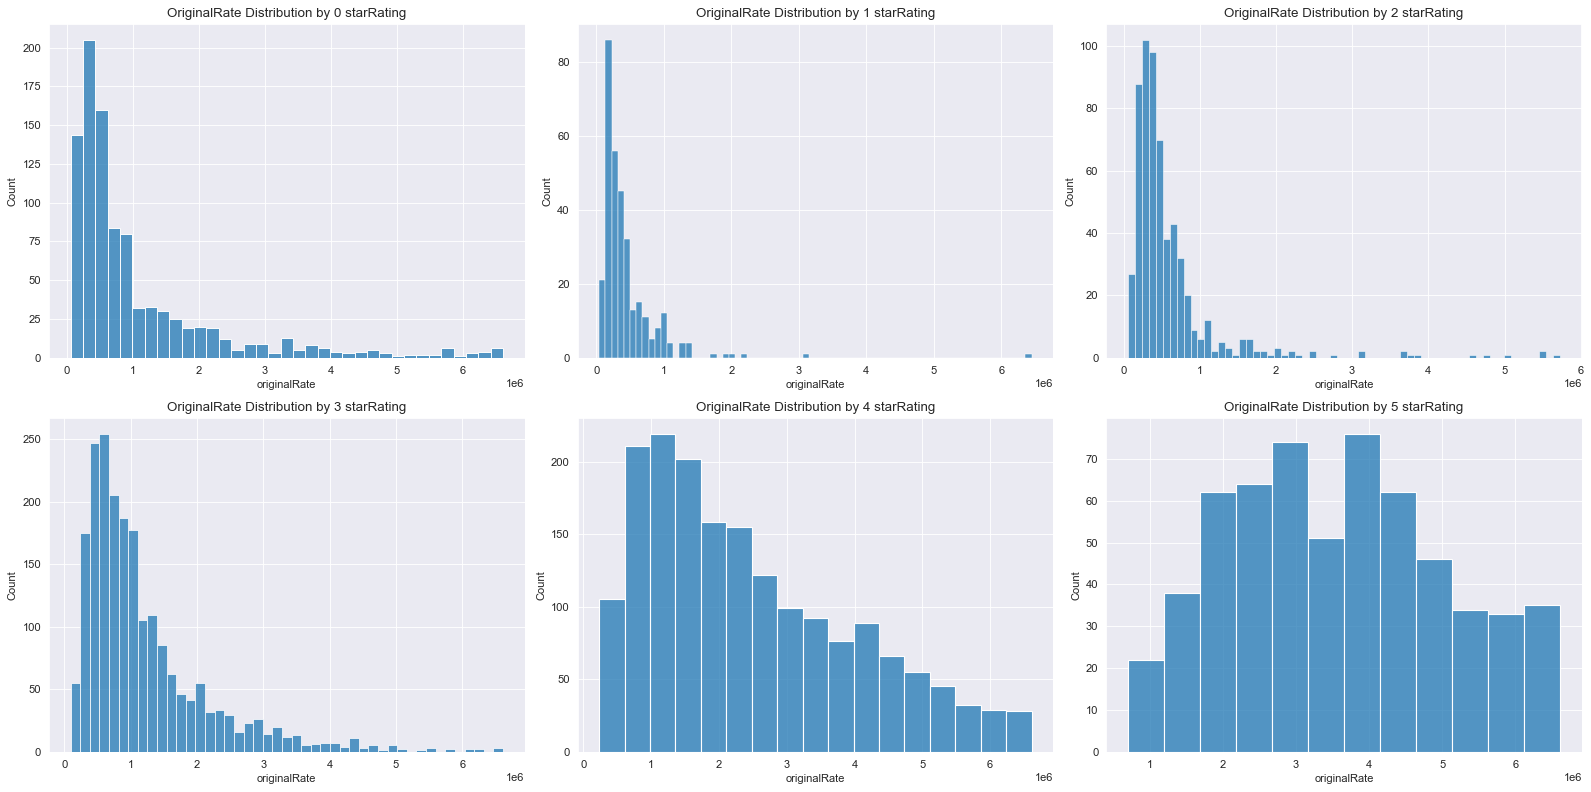

In [33]:
filtered_0 = df[df['starRating'] == 0.0]
filtered_1 = df[df['starRating'] == 1.0]
filtered_2 = df[df['starRating'] == 2.0]
filtered_3 = df[df['starRating'] == 3.0]
filtered_4 = df[df['starRating'] == 4.0]
filtered_5 = df[df['starRating'] == 5.0]

# OriginalRate Distribution by starRating using hisplot inside subplot
fig, ax = plt.subplots(2,3, figsize=(20, 10), dpi=80, gridspec_kw={'width_ratios': [1, 1, 1]})
sns.histplot(filtered_0,x="originalRate", ax=ax[0,0]).set(title='OriginalRate Distribution by 0 starRating')
sns.histplot(filtered_1,x="originalRate", ax=ax[0,1]).set(title='OriginalRate Distribution by 1 starRating')
sns.histplot(filtered_2,x="originalRate", ax=ax[0,2]).set(title='OriginalRate Distribution by 2 starRating')
sns.histplot(filtered_3,x="originalRate", ax=ax[1,0]).set(title='OriginalRate Distribution by 3 starRating')
sns.histplot(filtered_4,x="originalRate", ax=ax[1,1]).set(title='OriginalRate Distribution by 4 starRating')
sns.histplot(filtered_5,x="originalRate", ax=ax[1,2]).set(title='OriginalRate Distribution by 5 starRating')
fig.tight_layout()

In [34]:
df.groupby('starRating').agg(
    {'originalRate': ['mean', 'std', 'min', 'max',lambda x: x.quantile(0.25),'median', lambda x: x.quantile(0.75)]})

originalRate                                             \
                    mean           std     min      max  <lambda_0>   
starRating                                                            
0           1.084746e+06  1.259045e+06   60607  6611570   330579.00   
1           4.462668e+05  4.969806e+05   40313  6446281   195913.25   
2           5.933323e+05  6.836323e+05   55096  5730028   268854.50   
3           1.200529e+06  9.682570e+05   95041  6611571   550964.00   
4           2.463116e+06  1.542309e+06  231405  6611571  1194903.50   
5           3.577792e+06  1.476333e+06  698347  6611571  2383571.00   

                                   
               median  <lambda_1>  
starRating                         
0            584023.0  1276033.00  
1            309917.0   512193.75  
2            413223.0   656328.50  
3            893939.5  1487603.00  
4           2103719.0  3493823.50  
5           3504384.0  4608688.00

In [35]:
q1b1 = df[df['starRating'] == 1.0]['originalRate'].quantile(0.25)
q1b2 = df[df['starRating'] == 2.0]['originalRate'].quantile(0.25)
q1b3 = df[df['starRating'] == 3.0]['originalRate'].quantile(0.25)
q1b4 = df[df['starRating'] == 4.0]['originalRate'].quantile(0.25)
q1b5 = df[df['starRating'] == 5.0]['originalRate'].quantile(0.25)

In [36]:
# change starRating value based on originalRate 25% from other starRating
for i in range(0,5):
    if i == 0:
        df.loc[(df['starRating'] == i) & (df['originalRate'] > q1b1), 'starRating'] += 1.0
    elif i == 1:
        df.loc[(df['starRating'] == i) & (df['originalRate'] > q1b2), 'starRating'] += 1.0
    elif i == 2:
        df.loc[(df['starRating'] == i) & (df['originalRate'] > q1b3), 'starRating'] += 1.0
    elif i == 3:
        df.loc[(df['starRating'] == i) & (df['originalRate'] > q1b4), 'starRating'] += 1.0
    elif i == 4:
        df.loc[(df['starRating'] == i) & (df['originalRate'] > q1b5), 'starRating'] += 1.0

OriginalRate Distribution by starRating
3    1790
5    1732
4    1707
2     823
1     201
0     101
Name: starRating, dtype: int64


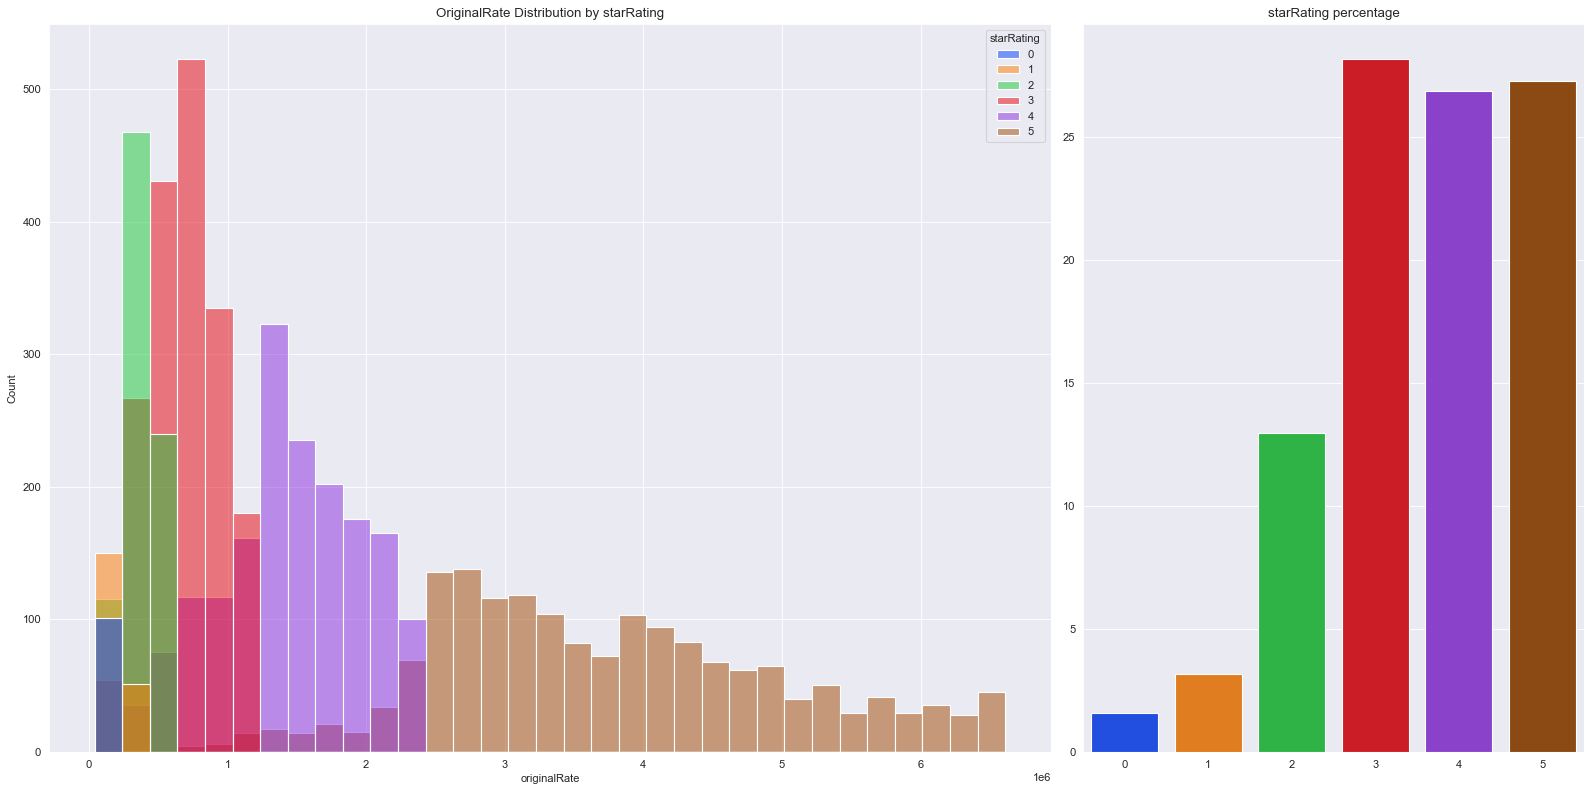

In [37]:
# change .5 star
df['starRating'] = df['starRating'].replace(1.5, 1)
df['starRating'] = df['starRating'].replace(3.5, 3)
df['starRating'] = df['starRating'].replace(4.5, 4)

# starRating Distribution
value = df.starRating.value_counts()

# starRating Distribution by percentage
value_percentage = value / len(df) * 100

print('OriginalRate Distribution by starRating')
print(value)

fig, ax = plt.subplots(1,2, figsize=(20, 10), dpi=80, gridspec_kw={'width_ratios': [1, 0.5]})
sns.histplot(df,x="originalRate", hue='starRating' ,palette='bright', ax=ax[0]).set(title='OriginalRate Distribution by starRating')

# starRating percentage plot
sns.barplot(x=value_percentage.index, y=value_percentage.values, palette='bright', ax=ax[1]).set(title='starRating percentage')

fig.tight_layout()

In [38]:
df.groupby('starRating').agg({'originalRate': ['mean', 'std', 'min', 'max',lambda x: x.quantile(0.25),'median', lambda x: x.quantile(0.75)]})

originalRate                                                       \
                    mean           std     min      max <lambda_0>     median   
starRating                                                                      
0           1.532357e+05  3.149420e+04   60607   195900   130028.0   157025.0   
1           1.972876e+05  4.900288e+04   40313   267769   163413.0   206612.0   
2           3.595947e+05  1.110327e+05   55096   550964   277396.5   357025.0   
3           6.933194e+05  2.505965e+05   95041  1193756   506887.0   694215.0   
4           1.464302e+06  5.004292e+05  231405  2380165  1157025.0  1453719.0   
5           3.747564e+06  1.261685e+06  698347  6611571  2754821.0  3553719.0   

                        
            <lambda_1>  
starRating              
0            183471.00  
1            239669.00  
2            446117.00  
3            881543.00  
4           1861799.50  
5           4587356.75

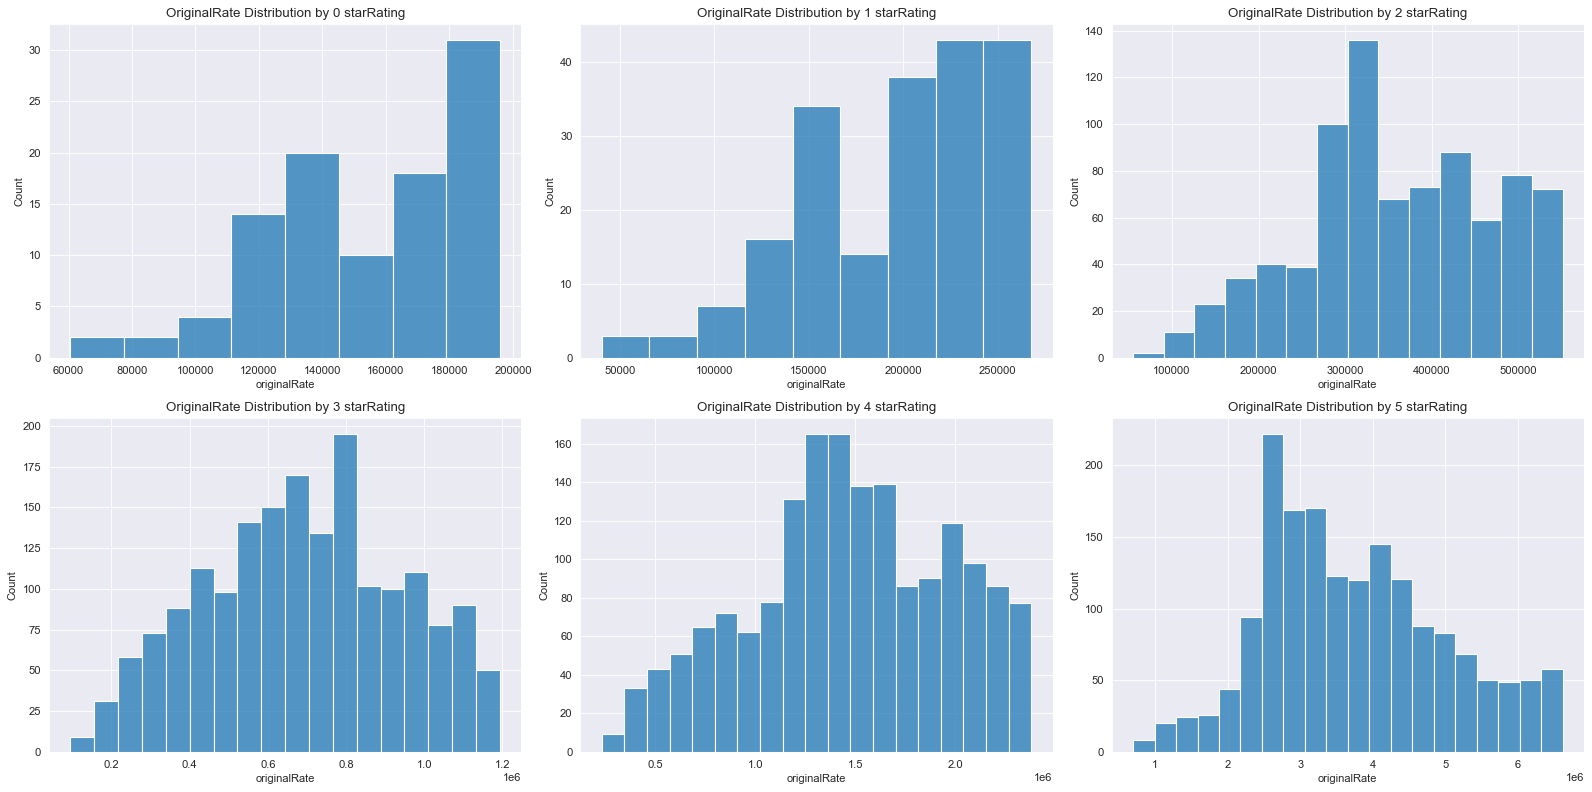

In [39]:
filtered_0 = df[df['starRating'] == 0]
filtered_1 = df[df['starRating'] == 1]
filtered_2 = df[df['starRating'] == 2]
filtered_3 = df[df['starRating'] == 3]
filtered_4 = df[df['starRating'] == 4]
filtered_5 = df[df['starRating'] == 5]

# OriginalRate Distribution by starRating using hisplot inside subplot
fig, ax = plt.subplots(2,3, figsize=(20, 10), dpi=80, gridspec_kw={'width_ratios': [1, 1, 1]})
sns.histplot(filtered_0,x="originalRate", ax=ax[0,0]).set(title='OriginalRate Distribution by 0 starRating')
sns.histplot(filtered_1,x="originalRate", ax=ax[0,1]).set(title='OriginalRate Distribution by 1 starRating')
sns.histplot(filtered_2,x="originalRate", ax=ax[0,2]).set(title='OriginalRate Distribution by 2 starRating')
sns.histplot(filtered_3,x="originalRate", ax=ax[1,0]).set(title='OriginalRate Distribution by 3 starRating')
sns.histplot(filtered_4,x="originalRate", ax=ax[1,1]).set(title='OriginalRate Distribution by 4 starRating')
sns.histplot(filtered_5,x="originalRate", ax=ax[1,2]).set(title='OriginalRate Distribution by 5 starRating')
fig.tight_layout()

### Handling `size` missing value

Missing value will be handled by using randomized value from 25% and 75% quantile of `size` based on every `starRating`

In [40]:
df.groupby('starRating').agg({'size': ['mean', 'std', 'min', 'max',lambda x: x.quantile(0.25),'median', lambda x: x.quantile(0.75)]})

size                                                        
                  mean          std  min      max <lambda_0> median <lambda_1>
starRating                                                                    
0            21.428571    10.534940  4.0     80.0      15.00   20.0       25.0
1            23.891503    35.915449  2.0    441.0      16.00   19.0       25.0
2            23.223021    29.126477  3.5    625.0      15.00   20.0       25.0
3            61.841964  1029.397823  3.0  36000.0      20.04   28.0       35.0
4            56.872724   139.390133  4.0   2600.0      28.00   36.0       50.0
5           192.528144  1320.910898  8.0  33000.0      45.00   75.0      140.0

In [41]:
df['size'].fillna(0, inplace=True)

for i in range (0,6):
    low_limit = df[df['starRating'] == i]['size'].quantile(0.25)
    high_limit = df[df['starRating'] == i]['size'].quantile(0.75)
    randomize = np.random.uniform(low_limit, high_limit)
    df.loc[(df['size'] == 0) & (df['starRating'] == i), 'size'] = randomize

In [42]:
df.groupby('starRating').agg({'size': ['mean', 'std', 'min', 'max',lambda x: x.quantile(0.25),'median', lambda x: x.quantile(0.75)]})

size                                                   \
                  mean          std  min      max <lambda_0>     median   
starRating                                                                
0            18.174011    10.893650  4.0     80.0   7.732295  16.000000   
1            20.205029    31.998028  2.0    441.0   8.454391  16.000000   
2            22.030691    24.428521  3.5    625.0  16.000000  19.250198   
3            49.518172   850.616975  3.0  36000.0  23.004660  23.004660   
4            48.762891   121.753210  4.0   2600.0  24.068257  32.000000   
5           143.612477  1124.797865  8.0  33000.0  16.756495  49.000000   

                       
           <lambda_1>  
starRating             
0                24.0  
1                24.0  
2                24.0  
3                30.0  
4                45.0  
5               110.0

#### Size Distribution 

Size
Maximum value : 36000.0
Minimum value : 2.0
Skew value : 42.026532831910345


<Figure size 1600x800 with 0 Axes>

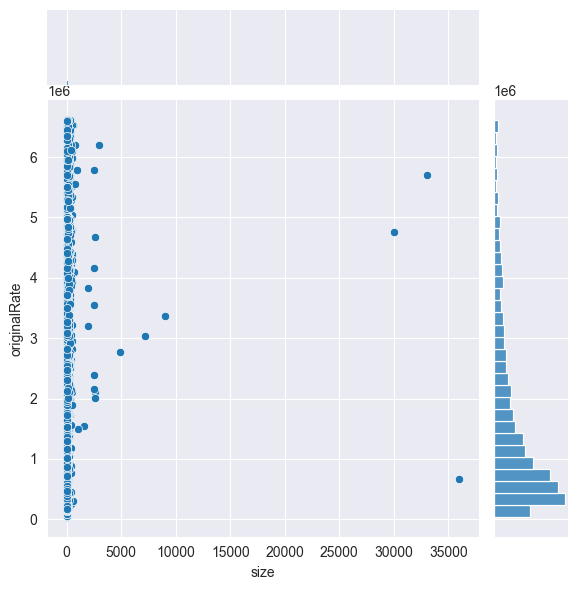

In [43]:
# Size Statistics
print('Size')
print('Maximum value : {}'.format(df['size'].max()))
print('Minimum value : {}'.format(df['size'].min()))
print('Skew value : {}'.format(df['size'].skew()))

# Size Distribution plot
plt.figure(figsize=(20, 10), dpi=80)
sns.set_style('darkgrid')
sns.jointplot(data=df, x='size', y='originalRate')
plt.show()

In [44]:
df_len = len(df)
df = iqr_outlier(df, 'size')
df_len = df_len - len(df)
print(f'Deleted row : {df_len}')
print(f'Remaining data : {df.shape[0]}')

Number of outliers: 739
Max outlier value: 36000.0
Min outlier value: 83.0
Deleted row : 739
Remaining data : 5615


Size
maximum value : 82.0
minimum value : 2.0
skew value : 1.3696699287929899


<Figure size 1600x800 with 0 Axes>

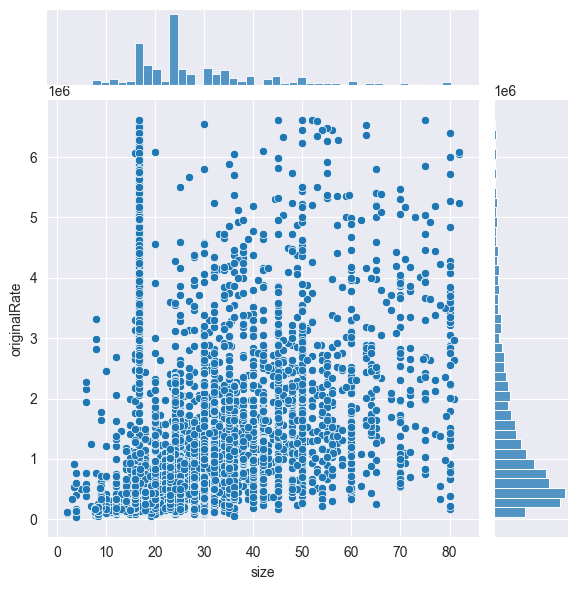

In [45]:
# Size Statistics
print('Size')
print('maximum value : {}'.format(df['size'].max()))
print('minimum value : {}'.format(df['size'].min()))
print('skew value : {}'.format(df['size'].skew()))

# Size Distribution plot
plt.figure(figsize=(20, 10), dpi=80)
sns.set_style('darkgrid')
sns.jointplot(data=df, x='size', y='originalRate')
plt.show()

In [46]:
# Output total deleted rows
print(f'Total rows : {df.shape[0]}')
print(f'Total deleted rows : {originalRows - df.shape[0]}')

Total rows : 5615
Total deleted rows : 1331


## Export Data to CSV

In [47]:
df.to_csv('../Dataset/clean_data.csv', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5615 entries, 0 to 6945
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type                     5615 non-null   object 
 1   city                     5615 non-null   object 
 2   hotelFacilities          5615 non-null   object 
 3   nearestPointOfInterests  5615 non-null   object 
 4   starRating               5615 non-null   int32  
 5   size                     5615 non-null   float64
 6   originalRate             5615 non-null   int32  
 7   baseOccupancy            5615 non-null   int64  
 8   maxChildOccupancy        5615 non-null   int64  
 9   maxChildAge              5615 non-null   int64  
 10  isBreakfastIncluded      5615 non-null   int64  
 11  isWifiIncluded           5615 non-null   int64  
 12  isRefundable             5615 non-null   int64  
 13  hasLivingRoom            5615 non-null   int64  
 14  roomFacilities          